In [126]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
img = cv2.imread("bordered_example.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_height, img_width = img.shape
img.shape

(718, 1502)

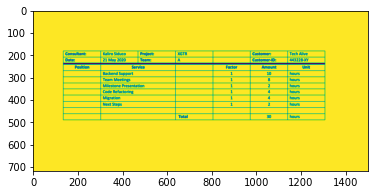

In [128]:
plt.imshow(img)
plt.show()

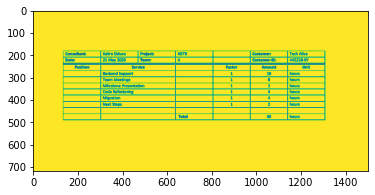

In [129]:
img_bin = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 5)
plt.imshow(img_bin)
plt.show()

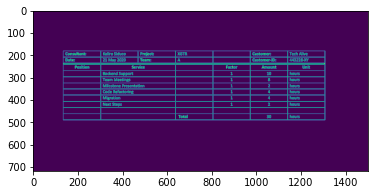

In [130]:
img_bin = 255 - img_bin
plt.imshow(img_bin)
plt.show()

In [131]:
kernel_len = img_width // 100

# Defining a vertical kernel to detect all vertical lines of image
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))  # shape (kernel_len, 1) inverted! xD

# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))  # shape (1,kernel_ken) xD

# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

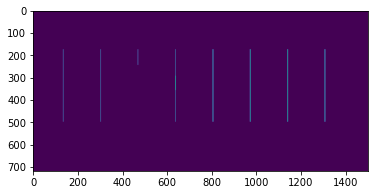

In [132]:
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=4)
plt.imshow(vertical_lines)
plt.show()

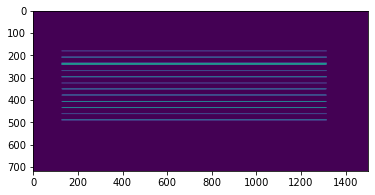

In [133]:
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=4)
plt.imshow(horizontal_lines)
plt.show()

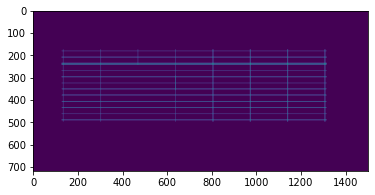

In [134]:
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
plt.imshow(img_vh)
plt.show()

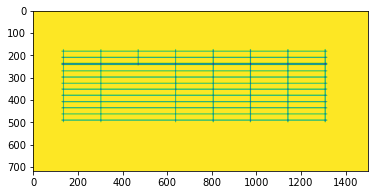

In [135]:
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
plt.imshow(img_vh)
plt.show()

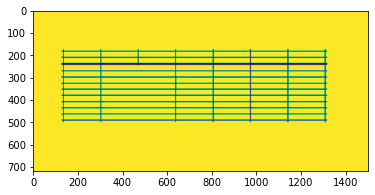

In [136]:
thresh, img_vh = cv2.threshold(img_vh, 128, 255, cv2.THRESH_BINARY )
plt.imshow(img_vh)
plt.show()

In [137]:
# bitxor = cv2.bitwise_xor(img, img_vh)
# bitnot = cv2.bitwise_not(bitxor)
# plt.imshow(bitnot)
# plt.show()

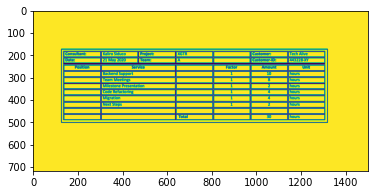

In [138]:
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

# Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

# Get mean of heights
mean = np.mean(heights)

# Create list box to store all boxes in
box = []
# Get position (x,y), width and height for every contour and show the contour on image
#print("lencontours", len(contours))
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w < 0.9*img_width and h < 0.9*img_height):
        image = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        box.append([x, y, w, h])
        
plt.imshow(image)
plt.show()

In [139]:
row = []
column = []
j = 0

# Sorting the boxes to their respective row and column
for i in range(len(box)):
    if (i == 0):
        column.append(box[i])
        previous = box[i]

    else:
        if (box[i][1] <= previous[1] + mean / 2):
            column.append(box[i])
            previous = box[i]

            if (i == len(box) - 1):
                row.append(column)

        else:
            row.append(column)
            column = []
            previous = box[i]
            column.append(box[i])
            
len(row), len(column)

(11, 6)

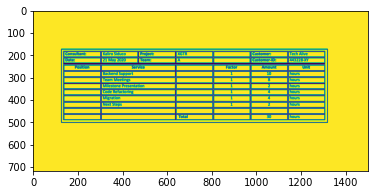

In [140]:
# checking the results
for i in range(len(row)):
    for j in range(len(row[i])):
        image = cv2.rectangle(img, (row[i][j][0], row[i][j][1]), ((row[i][j][0] + row[i][j][2], row[i][j][1] + row[i][j][3])), (0, 0, 0), 2)
        
plt.imshow(image)
plt.show()